## Lab 5, Problem 1

a) Explain why the inverse matrix M −1 can be used to calculate ⃗v−1 , the hypothetical state vector one
week before the revolution. Use np.linalg.inv(M) to calculate the inverse matrix and ⃗v−1 . What’s
the problem with this state?

b) Make the constructor of Markov more robust by including a dimension check of v0 and M using the len
function

In [12]:
import numpy as np
import matplotlib.pyplot as plt

class Markov():
    def __init__(self, v0, M, colors = []):
        self.__i = 0
        self.__v = [v0]
        self.__M = M
        self.colors = colors
               
    def __str__(self):
        return "Timestep: {}\nState: {}".format(self.__i, self.__v[-1])
    
    def evolve(self):
        self.__v.append( np.dot(self.__M, self.__v[-1]) )
        self.__i += 1

    # Evolve the system by n steps
    def batchEvolve(self, n):
        for _ in range(n):
            self.evolve()

    # Verify total number of voters remains constant
    def voters_constant(self):
        total_voters = np.sum(self.__v[0])
        return np.allclose([np.sum(v) for v in self.__v], total_voters)

    # Plot the number of voters for each party as a function of time
    def plot_voters(self):
        voters = np.array(self.__v)
        for i, color in enumerate(self.colors):
            plt.plot(voters[:, i], label=f'Party {i+1}', color=color)
        plt.xlabel('Time Steps')
        plt.ylabel('Number of Voters')
        plt.title('Voters vs. Time Steps')
        plt.legend()
        plt.show()

    # Find the vectors associated with the λ = 1
    def find_stable_state(self):
        eigenvalues, eigenvectors = np.linalg.eig(self.__M)
        return eigenvectors[:, np.isclose(eigenvalues, 1)].real.flatten()

# 3x3 stochastic matrix M and initial state vector v0
M = np.array([[0.5, 0.2, 0.3],
              [0.4, 0.4, 0.2],
              [0.1, 0.4, 0.5]])

v0 = np.array([0.6, 0.3, 0.1])

# Instantiate the Markov class with colors for the plot
colors = ['red', 'green', 'blue']
markov_model = Markov(v0, M, colors)

c) Verify that the total number of voters remains constant by writing a method that returns a list of the
sum of voters for every timestep.

In [14]:
voters_constant = markov_model.voters_constant()

print(f"The total number of voters remains constant: {voters_constant}")

The total number of voters remains constant: True


d) Explain why ⃗v10 can be calculated via M 10 · ⃗v0 . Write a new method batchEvolve that allows you to
calculate the next n timesteps via a single call.

In [15]:
markov_model.batchEvolve(100)

e) Implement a method that plots the number of voters for every party as a function of time. Calculate
the first 100 timesteps and create a plot. Describe your findings.

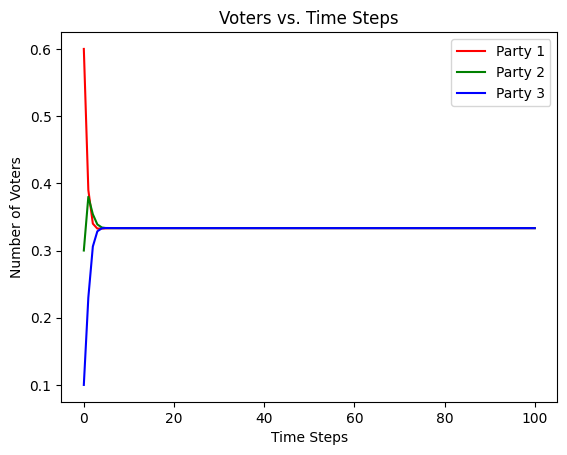

In [16]:
markov_model.plot_voters()

f) Why does the eigenvector vλ=1 associated with the eigenvalue λ = 1 represent the final state of the
system v∞ ? Use np.linalg.eig(M) to calculate vλ=1 .

In [17]:
stable_state = markov_model.find_stable_state()
print(f"The stable state of the system (λ = 1): {stable_state}")

The stable state of the system (λ = 1): [0.57735027 0.57735027 0.57735027]
